In [10]:
# python version : 3.7.13
# matplotlib version : 3.5.2
# openCV version : 4.6.0
# pytesseract version : 0.3.9
# tensorflow hub: 0.12.0
# tensorflow : 2.6.0
# keras : 2.6.0

# 버전 확인 코드
# openCV: cv2.__version__
# pytesseract :
# import pkg_resources
# pkg_resources.working_set.by_key['pytesseract'].version
# tf.__version__


'2.6.0'

In [2]:
# 전처리 함수
import matplotlib.pyplot as plt
def preprocessing(org_image):
    # 그레이 스케일 이미지
    gray_img = cv2.cvtColor(org_image, cv2.COLOR_BGR2GRAY)

    # grayscale -> binary
    binary_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    # plt_imshow('binary', binary_img)

    # noise remove
    kernel_size = 3 # 커널 사이즈를 홀수로 해야 함!!!!
    noNoise = cv2.medianBlur(binary_img, ksize=kernel_size)
    #plt_imshow('blur', noNoise)


    ### 해상도 높이는 과정이 필요하다 ###


    #plt.imshow(noNoise)
    return noNoise

In [ ]:
### tensorflow로 모델 생성, 학습 후 해상도 높인 이미지를 내보내도록 함수 짜기
### 학습시킨 모델을 h5로 저장하기.
# 참고: https://github.com/kairess/super_resolution/blob/master/train.ipynb
# 참고_토닥토닥: https://wikidocs.net/80780

In [ ]:
## 이미지 해상도 높이기. 학습시켜서...이미지 해상도 높임....

import cv2, os, glob
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Conv2D, Input, Activation
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from skimage.transform import pyramid_expand
from Subpixel import Subpixel
from DataGenerator import DataGenerator

추출이 완료되었습니다. 확인부탁드립니다.


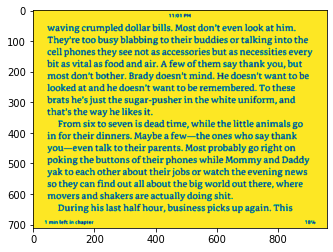

In [5]:
# 이미지에서 텍스트 추출
import pytesseract
import cv2
import os

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'


# 이미지들이 존재하는 파일
path_dir = 'C:\\Users\\HP\\Desktop\\meta\\3nd project_image editing\\imgs\\'
file_list = os.listdir(path_dir)


for file_name in file_list :
    # if file_name == "output.txt":
    #     continue
    # 이미지를 불러와서
    img = cv2.imread('C:\\Users\\HP\\Desktop\\meta\\3nd project_image editing\\imgs\\'+file_name)
    img = preprocessing(img) # 전처리
    # 결과물 text파일이 저장될 경로. 한 파일마다 txt파일을 생성하여 결과를 저장한다.
    result = open("C:\\Users\\HP\\Desktop\\meta\\3nd project_image editing\\imgs\\"+file_name+".txt","w", encoding='utf-8')

    # 추출해서 텍스트 파일로 저장
    result.write(pytesseract.image_to_string(img,
                    lang='ENG',config='--psm 4 -c preserve_interword_spaces=1')+'\n')
result.close()
print("추출이 완료되었습니다. 확인부탁드립니다.")
